# Overview:

The purpose of this project is two work through two very different sets of data. For Task 1, the purpose is to carry out some exploratory data analysis on this dataset and finding out how frequent each value is, and how much missing data there is.

Some of the things I decided to explore were:

- How many different species were killed? (Here 'killed' is defined as having the status of either 'dead', 'killed' or 'decomposed'.)
- What is the most common combination of capture method and target?
- Which fishery area is the worst in terms of bycatch? That is, find the area with highest number of bycatch events.
- Draw a scatter plot the latitude and longitude of all fisheries. Mark the area found in the previous question with a different colour.
- For each fishing year, compute the ratio of 'dead'/'killed'/'decomposed' to 'alive'. Fit a linear regression model to see how this ratio changes with time. Can we say with confidence that the bycatch situation is getting better or worse?

Whilst for Task 2, the purpose of this is to experiment with some PCA on the shape of a hand.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

Task 1: Fisheries Bycatch
===

In [3]:
df = pd.read_csv('protected_species_captures.csv')

In [4]:
df.head()

,fishing_year,datetime,taxon,status,identification,capture_method,method,target,vessel_size,area,version,latitude,longitude,mitigation_equipment,excluded
0,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.055313,-46.704290,NaN,NaN
1,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.025787,-46.696851,NaN,NaN
2,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.032242,-46.708154,NaN,NaN
3,2002/2003,2002-09-30 21:45:00+00:00,sooty shearwater,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.057565,-46.683379,NaN,NaN
4,2002/2003,2002-09-30 21:45:00+00:00,white-chinned petrel,dead,necropsy,net,trawl,Hoki,43+,Fiordland,v20180001,166.057377,-46.685194,NaN,NaN


In this data set there are data for a number of fishing events.  Each row is a report of a bycatch event: namely an occasion where a fishing exercise catches a species other than the one that is being targetted.  

The variables have the following interpretation
- **fishing_year** - the year of the fishing event
- **datetime** - the day and time of the event
- **taxon** - the species of the bycatch animal that was caught
- **status** - the state of the bytcatch animal
- **capture_method** - the fishing gear being used
- **method** - the implementation of the gear
- **target** - the species that was being targetted when the bycatch occurred
- **area** - region of the ocean where the event occurred
- **lattitude**, **longitude** - precise location of the event
- **mitigation_equipment**


In [5]:
# What statuses are there for the bycatch in the dataset?
print(df.status.unique())
# We can safely assume 'dead' 'killed' 'decomposed' means the species are killed.

['dead' 'alive' 'killed' 'decomposed' nan]


In [7]:
# 1. How many different species were killed?
kill = (df.status == 'dead') | (df.status == 'killed') | (df.status == 'decomposed' )
print(len(df[kill].taxon.unique()))

# What are the species?
print(df[kill].taxon.unique())

91
['sooty shearwater' 'white-chinned petrel' 'Chatham Island albatross'
 'New Zealand fur seal' 'giant petrels' 'Cape petrels'
 "Salvin's albatross" 'Common dolphin' 'New Zealand sea lion'
 'northern giant petrel' 'Elephant seal' 'common diving petrel'
 'Cape petrel' 'New Zealand white-capped albatross' 'seagulls'
 'albatrosses' "southern Buller's albatross" 'southern royal albatross'
 "Gibson's albatross" 'Campbell black-browed albatross' 'grey petrel'
 'Antipodean albatross' 'Westland petrel' 'grey-faced petrel'
 'gadfly petrels' 'black petrel' 'white-headed petrel' 'large seabirds'
 'Unidentified' 'fairy prion' 'Pilot whale long-finned'
 'New Zealand white-faced storm petrel' 'fluttering shearwater'
 'pied shag' 'flesh-footed shearwater' 'antarctic prion'
 'grey-backed storm petrel' 'short-tailed shearwater' 'Eurasian blackbird'
 'light-mantled sooty albatross' 'black-browed albatross'
 'northern royal albatross' 'Snares Cape petrel' 'mottled petrel'
 'southern giant petrel' 'Leopa

In [13]:
# What is the most common combination of capture method and target?
comb = df.groupby(['capture_method','target'])['target'].count()
print(comb[comb==comb.max()])

capture_method  target     
net             Arrow squid    2993
Name: target, dtype: int64


In [11]:
# 3. Which fishery area is the worst in terms of bycatch? That is, find the **area** with highest number of bycatch events.
print(df.area.value_counts())
# The area with highest number of bycatch events seems to be Stewart Snares Shelf .

Stewart Snares Shelf       3952
Auckland Islands           1787
West Coast South Island    1129
Subantarctic               1095
East Coast South Island    1043
Fiordland                   907
Chatham Rise                774
Northland and Hauraki       464
Cook Strait                 333
East Coast North Island     293
Taranaki                    288
Bay of Plenty               269
West Coast North Island     246
Kermadec Islands             81
Name: area, dtype: int64


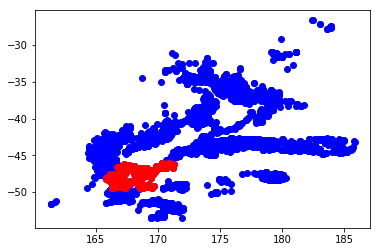

In [14]:
# 4. Draw a scatter plot the latitude and longitude of all fisheries. Mark the area found in the previous question with a different colour.
plt.scatter(df.latitude, df.longitude, c='b')
plt.scatter(df[df.area == 'Stewart Snares Shelf'].latitude, df[df.area == 'Stewart Snares Shelf'].longitude, c='r')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     11.82
Date:                Thu, 16 May 2019   Prob (F-statistic):            0.00441
Time:                        15:25:22   Log-Likelihood:                -9.2502
No. Observations:                  15   AIC:                             22.50
Df Residuals:                      13   BIC:                             23.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    200.5670     57.818      3.469      0.0

/usr/pkg/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


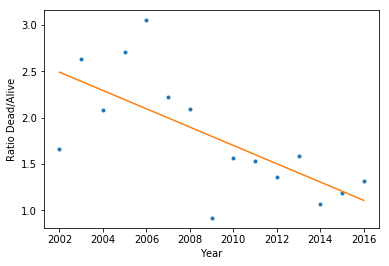

In [34]:
# 5. For each fishing year, compute the ratio of 'dead'/'killed'/'decomposed' to 'alive'. 
# Fit a linear regression model to see how this ratio changes with time. 
# Can we say with confidence that the bycatch situation is getting better or worse?

# Compute the series for x and y
y = df[(df.status=='dead')|(df.status=='killed')|(df.status=='decomposed')].groupby('fishing_year')['status'].count()/df[df.status=='alive'].groupby('fishing_year')['status'].count()
x = np.arange(2002, 2017)

# Fit the model
fittedmodel = smf.ols(formula="y ~ x", data=pd.DataFrame({'x':x, 'y':y})).fit() 
print(fittedmodel.summary());

# Compute plot
fit = np.polyfit(x,y,1)
p = np.poly1d(fit)
fig, ax = plt.subplots(1,1)
plt.plot(x, y, '.', x , p(x), '-')
ax.set(xlabel='Year', ylabel='Ratio Dead/Alive');

**Solution** - the p-value for the $x$ coefficient is small (p<0.05), so we conclude that there is a significant decrease over time.  The odds of a bycatch animal dying are decreasing over time.

Earlier versions of this kind of data lead to the Ministry of Primary Industries taking bycatch seriously. Briefly discuss how this data could best be used, and what, if any, ethical implications there are for it. (2 Marks)

**Solution** The data set can be used to track changes in bycatch over time - noting the frequency of occurrence, the species composition of the bycatch and the gear being used.   The Ministry of Primary Industries can use these data to establish which fishing practices are the most risky, and which are less risky for bycatch.  They can recommend or enforce a reduction in particular fishing methods in order to reduce the impact of fishing on non-target species.   The data are collected from fishing companies, and may be commercially sensitive, in that they may reveal to competing companies the practices of a company as it targets its fisheries.  Data should not be published in identifiable form. 

Task 2: Hand Shapes
===

In this task we are going to see an interesting thing that you can do with PCA, namely deform shapes. We describe each shape with a set of landmark points, and then look at how each landmark varies in its position across the dataset. 
There are 40 images of hands from 4 people, with 56 landmarks in 2D on each. 

The data is in hands.txt format.

The dataset has 40 columns and 112 rows.  Each column contains the image of one hand.  The first 56 rows are the x coordinates, and the next 56 rows contain the y coordinates.  (e.g. the 5th hand image is in column labelled 4  - since python labels columns from 0 onwards.)


In [58]:
# Load the data
points = np.loadtxt('hands.txt',delimiter=' ')
points

array([[1.0035 , 1.0102 , 1.0102 , ..., 1.064  , 1.0492 , 1.0519 ],
       [0.93228, 0.92019, 0.9175 , ..., 1.0049 , 1.0197 , 1.0344 ],
       [0.86911, 0.8503 , 0.83282, ..., 0.96589, 1.0102 , 1.0197 ],
       ...,
       [0.79912, 0.79778, 0.80046, ..., 0.72522, 0.74537, 0.73597],
       [0.783  , 0.783  , 0.78703, ..., 0.74941, 0.75747, 0.75209],
       [0.75612, 0.75478, 0.75344, ..., 0.76419, 0.77493, 0.77628]])

In [20]:
points.shape

(112, 40)

Now plot two of the hands to see what they look like. The $x$ coordinates are the first 56 numbers, and the $y$ coordinates the next 56, so you can plot points[:56,0] and points[56:,0]

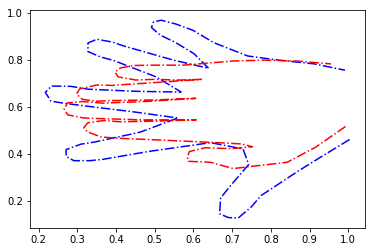

In [59]:
# Plotting two random hands, for example hand 1 (index 0) and hand 26 (index 25):
plt.plot(points[:56,0], points[56:,0], 'b-.', points[:56,25], points[56:,25], 'r-.');

Plot the points for all the hands on a single graph, so that you can see what a mess it is. I had to write a loop over the rows of points to plot them all.

Plot the first hand on top (with a line between the points) to see if you can see some kind of structure.

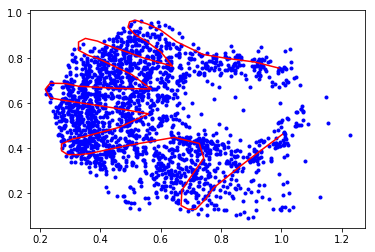

In [60]:
for i in range(1,points.shape[1]):
    plt.plot(points[:56,i], points[56:,i], 'b.')
plt.plot(points[:56,0], points[56:,0], 'r-');

I used the standardisation from scikit-learn to transform the data and plot it again, however it hasn't made much of a difference, pretty similar to before.

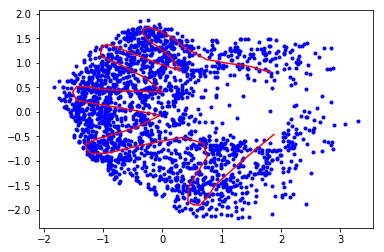

In [61]:
from sklearn.preprocessing import StandardScaler
stand_points = StandardScaler().fit_transform(points)

for i in range(1,stand_points.shape[1]):
    plt.plot(stand_points[:56,i], stand_points[56:,i], 'b.')
plt.plot(stand_points[:56,0], stand_points[56:,0], 'r-');

Aligning shape data is a bit harder. The way to perform the alignment is called **Procrustes alignment**. This name comes from Greek mythology. Procrustes was an innkeeper, who claimed the beds in his hotel were the perfect size for everybody. However, to make this true, he changed the person to fit the bed, not the bed to fit the person, stretching them or chopping bits off as necessary. Procrustes alignment does the same thing, without the brutality. 

It does this by rotating, translating, and scaling each set of points so that they are as close as possible to one that we choose as the reference set (the first, for simplicity). We implement this by following a set of steps:

(1) For each hand, move it so that the centroid (middle point) is at the origin by subtracting off the mean in x and y separately. In other words, compute the mean of the x coordinates of each shape, and subtract that from all of them, and the same in y. 
I had to make a new array called newpoints to put the data into. The command to compute the mean is np.mean. It's syntax is np.mean(A,axis=0), which computes the mean of each column of matrix A.

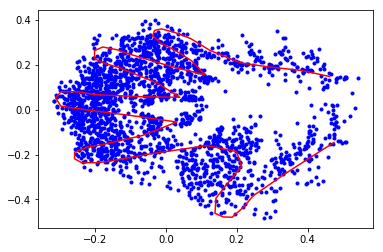

In [62]:
# Subtract the mean off the points, calling the new set "newpoints"
newpoints = np.zeros(np.shape(points))
newpoints[:56,:] = points[:56,:] - np.mean(points[:56,:], axis=0)
newpoints[56:,:] = points[56:,:] - np.mean(points[56:,:], axis=0)

# Plot the points
for i in range(1,newpoints.shape[1]):
    plt.plot(newpoints[:56,i], newpoints[56:,i], 'b.')

# Plot the first hand in red    
plt.plot(newpoints[:56,0], newpoints[56:,0], 'r-');

(2) Scale each hand so that the root mean square distance from the points to the origin is 1.  This accounts for the fact that some hands are large and some are small: this scaling makes them all (approximately) the same size.  

So compute the scale factor as $s = 1/k * \sqrt{(x_1 - \bar{x})^2 + (y_1 - \bar{y})^2 + \ldots + (y_k - \bar{y})^2}$ where there are $k$ points in each hand (so $k=56$). np.sum will help to do the addition. Then divide each of the points by this scale factor.

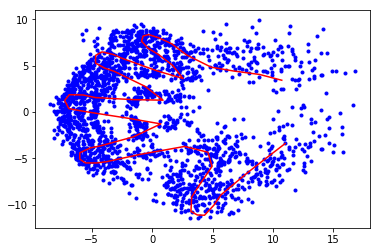

In [63]:
# For each hand, calculate s and scale it by s
k = 56
for j in range(0,40):
    ksum = np.sum(newpoints[:k,j]**2 + newpoints[k:,j]**2)
    s = np.sqrt(ksum)/k
    newpoints[:,j] = newpoints[:,j]/s

# Plot the points and first hand    
for i in range(1,newpoints.shape[1]):
    plt.plot(newpoints[:56,i], newpoints[56:,i], 'b.')
plt.plot(newpoints[:56,0], newpoints[56:,0], 'r-');    

(3) Now rotate each hand from 1 to 40 so that it best lines up with hand 0. 

In [64]:
for i in range(1,40):    #print(s)

    a = np.sum(newpoints[:,i]* newpoints[:,0])
    b = np.sum(newpoints[:56,i]*newpoints[56:,0] - newpoints[:56,0]*newpoints[56:,i])
    theta = np.arctan2(b , max(a, 10**-10))
    for j in range(56):
        point = np.array([newpoints[j,i],newpoints[j+56,i]])
        x = np.dot(np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]), point)
        newpoints[j,i] = x[0]
        newpoints[j+56,i] = x[1]

Plotting the data again. It's better, but the hand isn't properly lined up yet. 

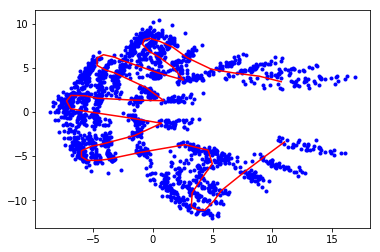

In [65]:
for i in range(1,newpoints.shape[1]):
    plt.plot(newpoints[:56,i], newpoints[56:,i], 'b.')
plt.plot(newpoints[:56,0], newpoints[56:,0], 'r-');    

We can make things better, by replacing the points data with newpoints, replacing the first datapoint with the mean, and then running the translation, rotation and scaling again. Run the code below, and then the previous three bits of code again. This time, the plot should look a bit more convincing.

In [66]:
points = newpoints
meanshape = np.mean(newpoints,axis=1)
points[:,0]=meanshape

# Now you can run the last 3 bits of code again for a more "organised" plots

Below is the code to do PCA. Run it. 

In [67]:
# Compute the covariance matrix
C = np.cov(newpoints)

# Get the eigenvalues and eigenvectors
evals,evecs = np.linalg.eig(C)

# Now need to sort them into descending order
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
evecs = np.real(evecs)  

**evecs** has 112 columns - one for each of the 112 principal components.  **evals** contains the weighting of each component.  The principal components are ordered by descending weight, so only the first few are important in describing the data.  

Plot the mean shape (i.e., the shape you get when you just compute the mean of each datapoint across the whole dataset), and also the mean shape plus and minus a small amount in each of the first few PCs (one at a time). 

In [68]:
print(evecs.shape)
print(evals.shape)

(112, 112)
(112,)


(112,)


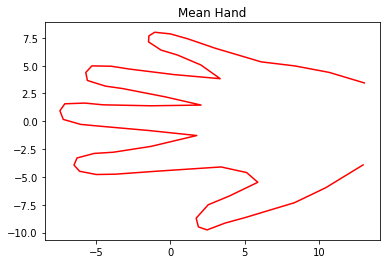

In [69]:
meanhand = np.mean(newpoints, axis = 1)
print(meanhand.shape)
plt.plot(meanhand[:56], meanhand[56:], 'r-');   
plt.title('Mean Hand');

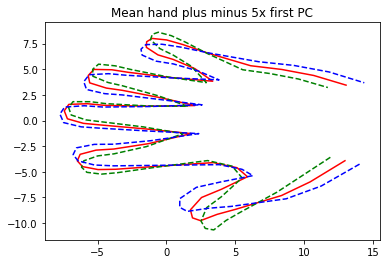

In [70]:
# First PC
pc = 0
xmean = meanhand[:56]
ymean = meanhand[56:]
xplus = meanhand[:56] + 5*evecs[:56,pc]
yplus = meanhand[56:] + 5*evecs[56:,pc]
xminus = meanhand[:56] - 5*evecs[:56,pc]
yminus = meanhand[56:] - 5*evecs[56:,pc]

plt.plot(xmean, ymean, 'r-')
plt.plot(xplus, yplus, 'g--')
plt.plot(xminus, yminus, 'b--');
plt.title('Mean hand plus minus 5x first PC');

PC1 captures the degree of spreading of the fingers - adding PC1 spreads out the hand

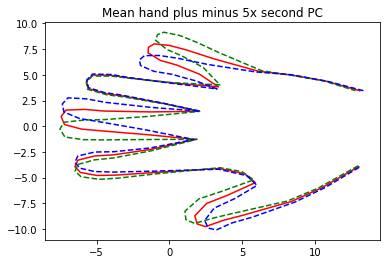

In [74]:
# Second PC
pc = 1
xmean = meanhand[:56]
ymean = meanhand[56:]
xplus = meanhand[:56] + 5*evecs[:56,pc]
yplus = meanhand[56:] + 5*evecs[56:,pc]
xminus = meanhand[:56] - 5*evecs[:56,pc]
yminus = meanhand[56:] - 5*evecs[56:,pc]

plt.plot(xmean, ymean, 'r-')
plt.plot(xplus, yplus, 'g--')
plt.plot(xminus, yminus, 'b--');
plt.title('Mean hand plus minus 5x second PC');

PC2 holds the ring fingers (approximately) fixed. Adding PC2 will move most fingers towards the ring finger, aside from the thumb.

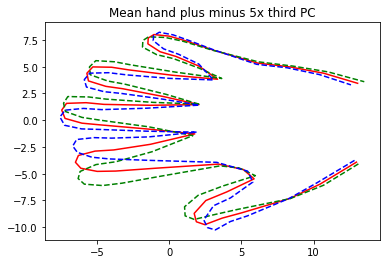

In [75]:
# Third PC
pc = 2
xmean = meanhand[:56]
ymean = meanhand[56:]
xplus = meanhand[:56] + 5*evecs[:56,pc]
yplus = meanhand[56:] + 5*evecs[56:,pc]
xminus = meanhand[:56] - 5*evecs[:56,pc]
yminus = meanhand[56:] - 5*evecs[56:,pc]

plt.plot(xmean, ymean, 'r-')
plt.plot(xplus, yplus, 'g--')
plt.plot(xminus, yminus, 'b--');
plt.title('Mean hand plus minus 5x third PC');

Adding to PC3 will move the middle three fingers closer together, while at the same time spread the thumb and little finger.

Decide how many principal components you should use by plotting the cumulative sum of the eigenvalues.

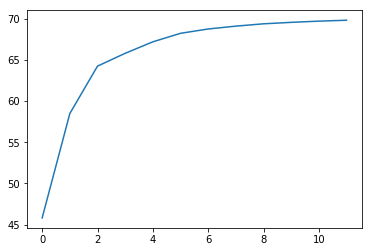

In [56]:
# The contributions of the first few PCs
plt.plot(np.cumsum(evals)[:12]);

The first 5 or 6 principal components explain most of the variation between the hand images.